## 需預先安裝的套件

* 請先安裝<a href="https://pypi.python.org/pypi/selenium" target="_blank">Python bindings for Selenium</a>:

```shell
pip install -U selenium
```
selenium 是一個用來自動化網站瀏覽操作的套件，詳細使用方式請見<a href="http://selenium-python.readthedocs.io/" target="_blank">教學文件</a>。

## 範例一：以網站的搜尋結果來統計每年某程式語言作為應徵條件的數量

In [1]:
def count_lang_num(prog_lang, skip_form=False):
    from selenium import webdriver
    from selenium.webdriver.common.keys import Keys
    from collections import Counter

    driver = webdriver.Firefox()
    if skip_form == False:
        driver.get("https://jobregister.aas.org") 
        lang_input = driver.find_element_by_name("search_theme_form") 
        lang_input.clear()
        lang_input.send_keys(prog_lang)
        lang_input.send_keys(Keys.RETURN)
    else:
        driver.get("https://jobregister.aas.org/search/node/" + prog_lang) 
        
    current_page_url = driver.current_url
    last_page_url = driver.find_element_by_link_text('last »').get_attribute("href")
    years_list =[]
       
    while(current_page_url != last_page_url):
        current_page_url = driver.current_url
        info_list =  driver.find_elements_by_class_name("search-info")
        years_list = years_list + [ info.text[info.text.find('201'):info.text.find('201')+4] for info in info_list]         
        try:
            next_link = driver.find_element_by_link_text('next ›')
            next_link.send_keys(Keys.RETURN)
        except:
            break
    driver.close()
    return Counter(years_list)

In [2]:
count_python = count_lang_num('python')
count_idl = count_lang_num('idl')
count_matlab = count_lang_num('matlab')

<IPython.core.display.Javascript object>


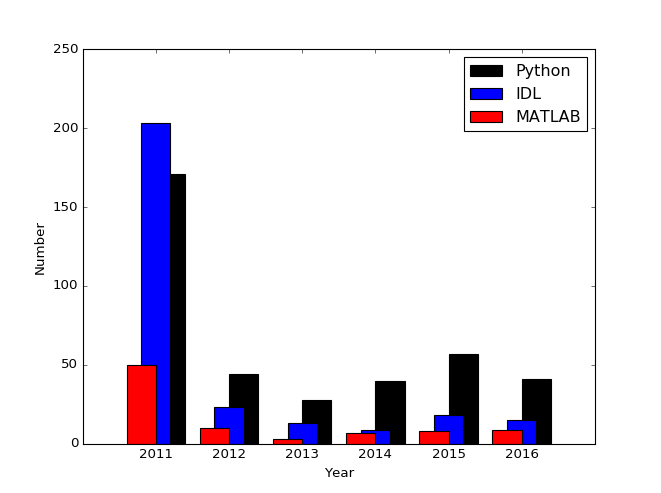

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
years = np.array([2011, 2012, 2013, 2014, 2015, 2016])
n_python = np.array([], dtype=int)
n_idl = np.array([], dtype=int)
n_matlab = np.array([], dtype=int)
for year in years:
    n_python = np.append(n_python,  count_python[str(year)])
    n_idl = np.append(n_idl,  count_idl[str(year)])
    n_matlab = np.append(n_matlab,  count_matlab[str(year)])

fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(years, n_python, 0.4, align='edge', color='black', label='Python')
plt.hold(True)
plt.bar(years, n_idl, 0.4, align='center', color='blue', label='IDL')
plt.bar(years, n_matlab, -0.4, align='edge', color='red', label='MATLAB')
plt.hold(False)
plt.legend()
plt.xticks([2011, 2012, 2013, 2014, 2015, 2016])
plt.ylabel('Number')
plt.xlabel('Year')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.show()